In [185]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
%matplotlib inline

In [186]:
df=pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [188]:
df.skew()

User ID           -0.034513
Age                0.231337
EstimatedSalary    0.495024
Purchased          0.596903
dtype: float64

In [189]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


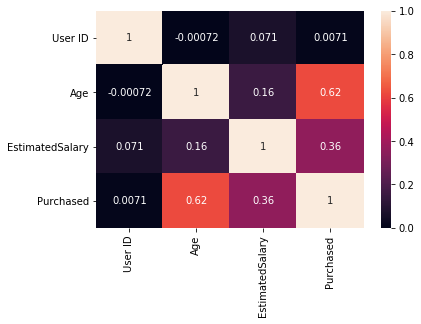

In [190]:
sns.heatmap(df.corr(),annot=True)

In [191]:
df['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [192]:
df.drop('User ID',axis=1,inplace=True)

In [193]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [194]:
df.Gender=le.fit_transform(df.Gender)

In [195]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [196]:
X=df.drop('Purchased',axis=1)
y=df['Purchased']

In [197]:
from sklearn.model_selection import train_test_split

In [198]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [199]:
from sklearn.preprocessing import MinMaxScaler

In [200]:
sc=MinMaxScaler()

In [201]:
X_train=sc.fit_transform(X_train)

In [202]:
X_test=sc.transform(X_test)

In [203]:
X_train_sc=pd.DataFrame(X_train)

In [204]:
X_test_sc=pd.DataFrame(X_test)

In [205]:
from sklearn.naive_bayes import GaussianNB

In [206]:
gnb=GaussianNB()

In [207]:
g=gnb.fit(X_train_sc,y_train)

In [209]:
pre_train=g.predict(X_train_sc)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
print('accuracy_score')
print(accuracy_score(y_train,pre_train))


In [ ]:
print('confusion matrix\n\n',confusion_matrix(y_train,pre_train))

In [ ]:
print('\n\nclassification report: \n\n',classification_report(y_train,pre_train))


In [ ]:
pre_test=gnb.predict(X_test_gnb)

In [ ]:
print('accuracy_score')
print(accuracy_score(y_train,pre_train))


In [ ]:
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB()